In this notebook I am attempting to  get data from a server using queries  and using matplotlib to plot the results

In [69]:

import psycopg2
import pyodbc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [21]:
conn = pyodbc.connect(
    Driver="ODBC Driver 17 for SQL Server",
    Server='JAQENIZO\SQLEXPRESS',
    Trusted_Connection="yes",  # or "no" if not using Windows Authentication
    Database="CRAIGSLIST"
)

cursor = conn.cursor()



**Quering the database**

In [79]:
query1 = """
select model,manufacturer,manufac_year from VEHICLES_DETAILS WHERE manufacturer='CHEVROLET' AND manufac_year >1993
"""

cursor.execute(query1)
volvos = cursor.fetchall()



myArr =[]
for obj in volvos:
  myArr.append(np.array(obj))


myArr
   
    
    
    
 

df = pd.DataFrame(myArr,columns=["model","manufacturer","manufac_year"])
df

#Ensure you have matplotlib installed.
#df is your dataframe



,model,manufacturer,manufac_year
0,tahoe,chevrolet,2012
1,equinox,chevrolet,2015
2,silverado,chevrolet,2018
3,silverado 2500,chevrolet,2012
4,2500,chevrolet,2012
...,...,...,...
51362,camaro ss coupe 2d,chevrolet,2020
51363,silverado 1500,chevrolet,2015
51364,classic,chevrolet,2005
51365,classic,chevrolet,2005


In [84]:
df2 = pd.DataFrame(data=volvos)
df2

,0
0,"[tahoe, chevrolet, 2012]"
1,"[equinox, chevrolet, 2015]"
2,"[silverado, chevrolet, 2018]"
3,"[silverado 2500, chevrolet, 2012]"
4,"[2500, chevrolet, 2012]"
...,...
51362,"[camaro ss coupe 2d, chevrolet, 2020]"
51363,"[silverado 1500, chevrolet, 2015]"
51364,"[classic, chevrolet, 2005]"
51365,"[classic, chevrolet, 2005]"


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


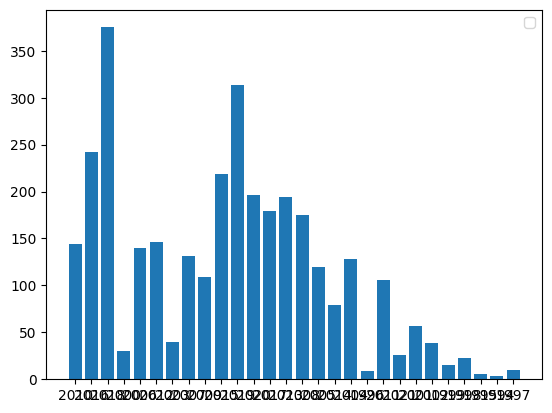

In [76]:
years = df['manufac_year'].unique()
numVeh = []

for year in years:
    numVeh.append((year,len(df.loc[df["manufac_year"]== year])))
    
numVeh

plotYears = [i[0] for i in numVeh]
vehicles = [i[1] for i in numVeh]

plt.bar(plotYears,vehicles)
plt.xlabel= "Years"
plt.ylabel = "Num of Veh"
plt.legend()
plt.show()
    